In [16]:
import copy
import cv2
import numpy as np
from PIL import Image, ImageFilter
from enum import Enum


class Filter_Type(Enum):
    MIN = 1
    MAX = 2
    MEDIAN = 3
    
class Print_Mode(Enum):
    ON = 1
    OFF = 2
    
def padding(image, padding_size):
    pad_w = padding_size[0]
    pad_h = padding_size[1]
         
    h = len(image)
       
    for i in range(pad_w):
        for i in range(h):
            image[i].insert(0,0)
            image[i].append(0)
    
    length = len(image[0])
    pad_line = [0]*length    
    

    for i in range(pad_h):
        image.insert(0,pad_line)
        image.append(pad_line)
 

def nonlinear_filtering(image, filter_size, padding_size=None, mode=Filter_Type.MIN, print_mode = Print_Mode.ON):
    h = len(image)
    w = len(image[0])  
        
    """ Apply padding if a padding size is given as a tuple (padding_width, padding_height) """
    if padding_size != None:
       padding(image, padding_size)
       
    
    pad_w = padding_size[0]
    pad_h = padding_size[1]  
    
    h_padded = h + pad_h*2
    w_padded = w + pad_w*2
 
    if print_mode == Print_Mode.ON:
        print("input image with size " + str((h,w)) + "and with padding size" + str(padding_size) + "\n")
        
        for i in range(w):
            for j in range(h):
                print(image[i][j], end=' ')
            print("\n")    
        
    output_image = [[0 for _ in range(w_padded-filter_size[0]+1)] for _ in range(h_padded-filter_size[1]+1)]

    h2 = len(output_image)
    w2 = len(output_image[0])
       
    window_area = list()

    k = 0
    l = 0
    
    """ apply chosen filter to the input image and create output image"""
    
    for i in range(w_padded-filter_size[0]+1): # main border (traveling to left should stop before coming to border - filter_size)
        for j in range(h_padded-filter_size[1]+1):  # main border (traveling to botto should stop before coming to border - filter_size)
            for a in range(filter_size[0]): #each tour should be in size of given filter (if kernel is 3x3, we should stop and calculate the minimum,maximum or median after each 3 step to left)
                for b in range(filter_size[1]): #each tour should be in size of given filter (if kernel is 3x3, we should stop and calculate the  minimum,maximum or median after each 3 step to bottom)
                    window_area.append(image[i+a][j+b])
            if mode == Filter_Type.MIN:  
                pixel = min(window_area)
            elif mode ==  Filter_Type.MAX:
                pixel = max(window_area)
            elif mode ==  Filter_Type.MEDIAN:
                window_area.sort()  
                length = len(window_area)
                middle_pixel_index = int(length / 2)
                pixel = window_area[middle_pixel_index]
            output_image[k][l] = pixel 
            l += 1
            if l >= w2:
                l = 0
                k += 1
            window_area.clear()
            
    """print the output image """     
    
    if print_mode == Print_Mode.ON:
        print("output image with size " + str((h2,w2)) + " after " + str(mode).split('.')[1] +  " filtering \n")
        
        for i in range(w2):
            for j in range(h2):
                print(output_image[i][j], end=' ')
            print("\n")                

    return output_image



""" Test with a 2D list """

def Test_2D_list():
    im1 = [[0,0,2,5,50,50,100,150,150], 
       [0,10,12,25,15,10,5,200,204],
       [2,1,5,10,100,4,150,178,101],
       [12,10,15,20,101,2,1,5,12],
       [10,3,5,13,72,88,95,4,7],
       [15,0,3,90,102,90,100,101,10],
       [4,4,5,52,18,10,10,17,50],
       [50,50,15,45,100,15,22,1,8],
       [10,4,2,0,0,0,50,5,103]]
       

    filter_size = (3,3)
    
    input_image = copy.deepcopy(im1)   
    output_image = nonlinear_filtering(input_image,filter_size, (1,1))
    
    input_image = copy.deepcopy(im1)  
    nonlinear_filtering(input_image,filter_size, (1,1),Filter_Type.MAX)
    
    input_image = im1.copy() 
    nonlinear_filtering(im1,filter_size,(1,1),Filter_Type.MEDIAN)
    
    
""" Test with a real image using opencv  to list conversion """

def Test_Image():
    im2 = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE) 
    cv2.imshow("input_image", im2)
    cv2.waitKey(0) # Press a key, not x (cross) button on coming window
    w,h = im2.shape
    
    input_image = im2.tolist()
    output_image = np.array(nonlinear_filtering(input_image,(3,3), (1,1), Filter_Type.MIN, print_mode = Print_Mode.OFF), dtype=np.uint8)
    cv2.imshow("MIN output_image", output_image)
    cv2.waitKey(0) # Press a key, not x (cross) button on coming window
    
    input_image = im2.tolist()
    output_image = np.array(nonlinear_filtering(input_image,(3,3), (1,1), Filter_Type.MAX, print_mode = Print_Mode.OFF), dtype=np.uint8)
    cv2.imshow("MAX output_image", output_image)
    cv2.waitKey(0) # Press a key, not x (cross) button on coming window
    
    input_image = im2.tolist()
    output_image = np.array(nonlinear_filtering(input_image,(3,3), (1,1), Filter_Type.MEDIAN, print_mode = Print_Mode.OFF), dtype=np.uint8)
    cv2.imshow("MEDIAN output_image", output_image)
    cv2.waitKey(0) # Press a key, not x (cross) button on coming window
    
    cv2.destroyAllWindows() 


""" Compare the same image with Python's PIL image """

def PIL_Comparison():
    im1 = Image.open("/home/ilker/Desktop/Camera Tracks/07.23.22/10kV EL/1/Pb210, Locked II18_00033.tif")
    im1.mode = 'I'
    im1 = im1.point(lambda i:i*(1./256)).convert('L').filter(ImageFilter.BLUR)

    # applying the min filter
    im2 = im1.filter(ImageFilter.MinFilter(size = 1))
    im2.show()
    
    # applying the max filter
    im2 = im1.filter(ImageFilter.MaxFilter(size = 1))
    im2.show()
    
    # applying the median filter 
    im2 = im1.filter(ImageFilter.MedianFilter(size = 1)) 
    im2.show()
    
    # applying the median filter to a noisy image 
    
    
    
    #im1 = Image.open("noisy.jpeg")
    im2 = im1.filter(ImageFilter.MedianFilter(size = 3)) 
    im2.show()

    
 
#Test_2D_list()
#Test_Image()
PIL_Comparison()    


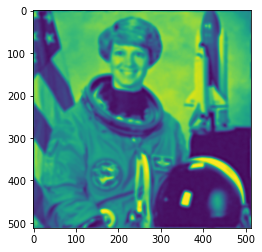

In [27]:
from skimage import color, data, restoration
import matplotlib.pyplot as plt
img = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d
psf = np.ones((2, 2)) / 50
img = convolve2d(img, psf, 'same')
rng = np.random.default_rng()
img += 0.1 * img.std() * rng.standard_normal(img.shape)
deconvolved_img = restoration.wiener(img, psf, 0.1)
plt.imshow(deconvolved_img)